In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
df = pd.read_csv("general_data.csv", index_col = "EmployeeID")
df.drop(columns = ["Over18", "EmployeeCount", "StandardHours"], inplace=True)

In [3]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2
4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2


# Checking for null values

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Filling null values

In [5]:
for column in ["NumCompaniesWorked", "TotalWorkingYears"]:
    df[column].fillna(df[column].median(), inplace=True)

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4


In [8]:
nom_cat_var = ["Attrition", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]
travel_mapping = {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2}
df.BusinessTravel = df.BusinessTravel.map(travel_mapping)

# Checking correlation between all variables

In [9]:
df.corr()

,Age,BusinessTravel,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.011807,0.006963,-0.035706,-0.002884,-0.044314,0.298869,-0.033137,-0.031753,0.680340,-0.027308,0.311309,0.216513,0.202089
BusinessTravel,-0.011807,1.000000,0.014130,0.007567,0.013727,-0.055905,-0.030698,-0.025727,0.004770,0.008298,-0.043173,0.005212,0.005222,-0.000229
DistanceFromHome,0.006963,0.014130,1.000000,-0.008638,-0.037329,-0.021607,-0.013514,0.038125,0.011169,0.009314,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,0.007567,-0.008638,1.000000,0.045746,0.006410,-0.016195,-0.040531,0.001261,-0.010813,0.010472,0.006080,0.022490,0.005358
JobLevel,-0.002884,0.013727,-0.037329,0.045746,1.000000,0.047316,-0.010116,0.010973,0.000993,-0.036779,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.055905,-0.021607,0.006410,0.047316,1.000000,-0.020515,0.004325,0.026930,-0.033758,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.298869,-0.030698,-0.013514,-0.016195,-0.010116,-0.020515,1.000000,0.031062,0.017282,0.238273,-0.032225,-0.117490,-0.036326,-0.109207
PercentSalaryHike,-0.033137,-0.025727,0.038125,-0.040531,0.010973,0.004325,0.031062,1.000000,0.012548,-0.018810,-0.037392,-0.029707,-0.029542,-0.040864
StockOptionLevel,-0.031753,0.004770,0.011169,0.001261,0.000993,0.026930,0.017282,0.012548,1.000000,0.002743,-0.069902,0.007886,0.019063,0.017757
TotalWorkingYears,0.680340,0.008298,0.009314,-0.010813,-0.036779,-0.033758,0.238273,-0.018810,0.002743,1.000000,-0.040843,0.626737,0.404015,0.458403


# Encoding categorical variables

In [10]:
for column in nom_cat_var:
    df[column] = le.fit_transform(df[column])

In [11]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,
1,51,0,1,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
2,31,1,2,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
3,32,0,2,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
4,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
5,32,0,1,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


# Splitting independent and dependent variables

In [12]:
y = df[['Attrition']]
X = df[list(set(df.columns) - set(y.columns))]

# Checking for any less density extreme outliers

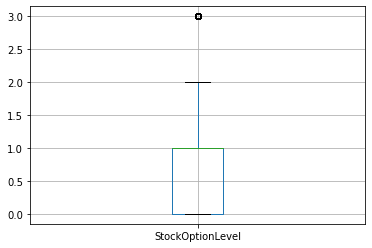

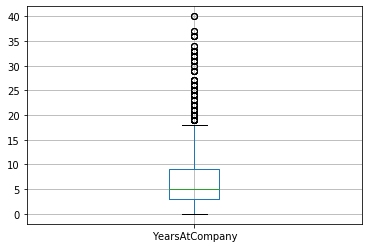

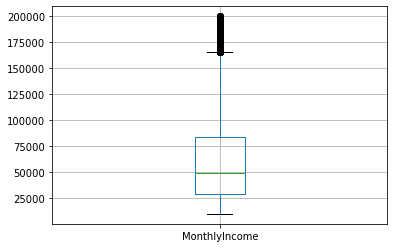

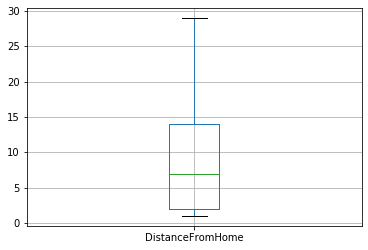

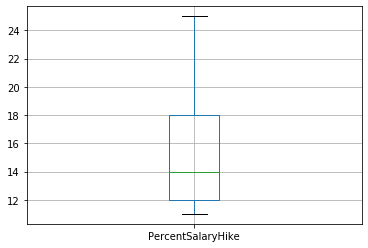

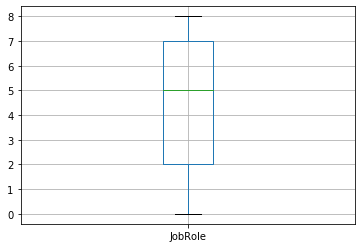

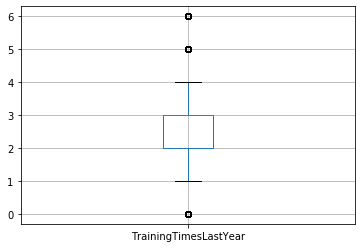

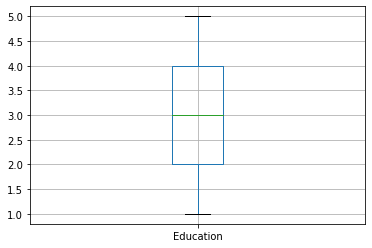

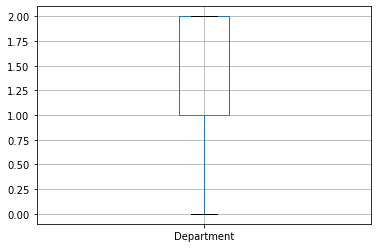

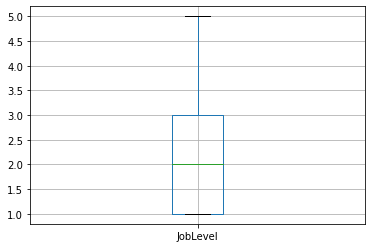

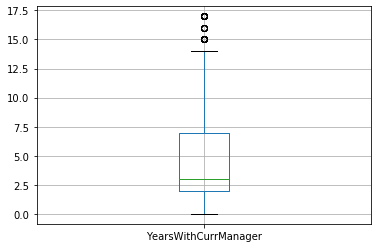

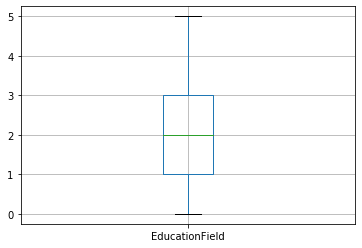

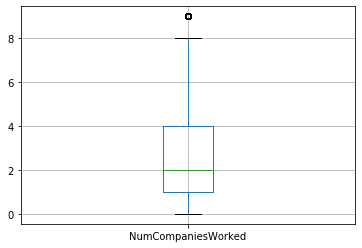

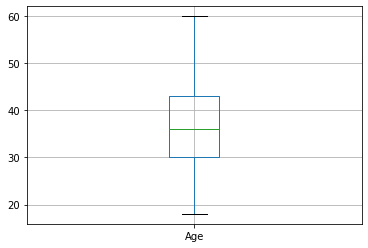

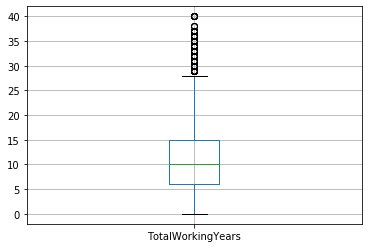

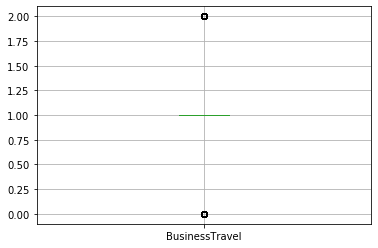

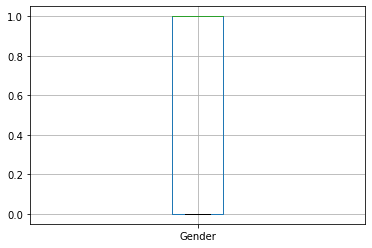

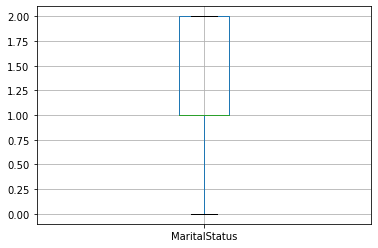

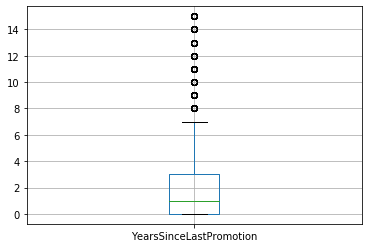

In [13]:
features = X.columns
for column in features:
    df.boxplot([column])
    plt.show()

# No such extreme outlier found, Now checking which feature significantly affects the dependent variable

In [14]:
X1 = sm.add_constant(X)
Logistic = sm.Logit(y, X1)
result = Logistic.fit()

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4390
Method:                           MLE   Df Model:                           19
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1305
Time:                        05:54:06   Log-Likelihood:                -1693.6
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 8.938e-96
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8806      0.408     -2.160      0.031      -1.680      -0.081
StockOptionLevel           -0.0677      0.052     -1.303      0.193      -0.170       0.034
YearsAtCompany              0.0144      0.019      0.772      0.440      -0.022       0.051
MonthlyIncome           -1.405e-06   9.58e-07     -1.466      0.143   -3.28e-06    4.73e-07
DistanceFromHome           -0.0018      0.005     -0.321      0.748      -0.012       0.009
PercentSalaryHike           0.0170      0.012      1.433      0.152      -0.006       0.040
JobRole                     0.0379      0.018      2.088      0.037       0.002       0.074
TrainingTimesLastYear      -0.1438      0.036     -4.017      0.000      -0.214      -0.074
Education                  -0.0611      0.043     -1.418      0.156      -0.146       0.023
Department                 -0.2893      0.082     -3.520      0.000      -0.450      -0.128
JobLevel                   -0.0207      0.040     -0.517      0.605      -0.099       0.058
YearsWithCurrManager       -0.1413      0.023     -6.249      0.000      -0.186      -0.097
EducationField             -0.1035      0.034     -3.047      0.002      -0.170      -0.037
NumCompaniesWorked          0.1286      0.019      6.873      0.000       0.092       0.165
Age                        -0.0307      0.007     -4.442      0.000      -0.044      -0.017
TotalWorkingYears          -0.0613      0.012     -5.050      0.000      -0.085      -0.038
BusinessTravel              0.7366      0.084      8.797      0.000       0.572       0.901
Gender                      0.1156      0.091      1.277      0.202      -0.062       0.293
MaritalStatus               0.5869      0.064      9.161      0.000       0.461       0.712
YearsSinceLastPromotion     0.1336      0.021      6.463      0.000       0.093       0.174
===========================================================================================
"""

# From the above table we can say that the following variables significantly affect the dependent variable

In [26]:
features = ["TrainingTimesLastYear", "EducationField", "JobRole", "YearsWithCurrManager", "NumCompaniesWorked", "MaritalStatus", "BusinessTravel", "Department", "Age", "YearsSinceLastPromotion", "TotalWorkingYears"]
for feature in features:
    print(feature, end=", ")

TrainingTimesLastYear, EducationField, JobRole, YearsWithCurrManager, NumCompaniesWorked, MaritalStatus, BusinessTravel, Department, Age, YearsSinceLastPromotion, TotalWorkingYears, 

# Out of which the following greatly affect the dependent variable

In [28]:
print("TrainingTimesLastYear, Department, YearsWithCurrManager, NumCompaniesWorked, Age, TotalWorkingYears, BusinessTravel, MaritalStatus, YearsSinceLastPromotion")

TrainingTimesLastYear, Department, YearsWithCurrManager, NumCompaniesWorked, Age, TotalWorkingYears, BusinessTravel, MaritalStatus, YearsSinceLastPromotion
